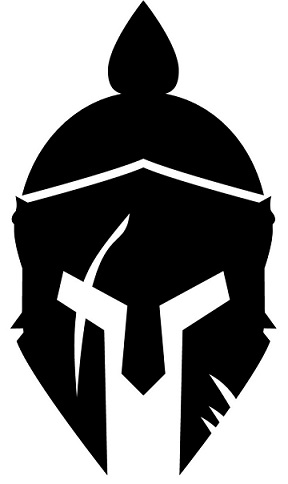
# <CENTER>ClasIAtor</CENTER>
## <CENTER>RF Signal Classifier using Artificial Intelligence</CENTER>
## <CENTER>Clasificador de señales de RF con Inteligencia Artificial</CENTER>

In [1]:
#!pip install opencv-python
# import required libraries
import cv2
import os
import logging
import argparse
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import ipywidgets as widgets

logger = logging.getLogger(__name__)
# signal repository
web = 'https://www.sigidwiki.com/wiki/HF'
repo = '../signals/'

def main():
    print("Clasificación de señales de RF con IA ClasIAtor!")
    print("Modulo diseñado y programado por Francisco Ochando")
    print("Evaluado por Antonio M.")
    print("Evaluado por A. M. Martinez")

if __name__ == "__main__":
    main()


Clasificación de señales de RF con IA ClasIAtor!
Modulo diseñado y programado por Francisco Ochando
Evaluado por Antonio M.
Evaluado por A. M. Martinez


In [2]:
ficheros = os.listdir(repo) # Lista de ficheros log
# Selecciona el fichero
fichero = widgets.Dropdown(
    options= ficheros, value= ficheros[0], description='Fichero:', disabled= False,
)
logger.warning(f"Select file before continue.")
display(fichero)

Select file before continue.


Dropdown(description='Fichero:', options=('225px-Coherent_PSK2.jpg', '225px-Coherent_PSK2.jpg.csv', '225px-STA…

In [3]:
# read the input image
img = cv2.imread(repo + fichero.value, 0)
logger.warning(f"Loading: {repo + fichero.value}")

Loading: ../signals/dataset_STANAG.bmp


In [4]:
# Show gray scale
cv2.imshow('grayscale image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print("Signal = ", fichero.value)
print("Image shape (rows, cols) = ", img.shape)
  
# img will be a numpy array of the above shape
imgcol = img.shape[1]
imgrow = 260

slide = widgets.IntSlider(
    value=2,
    min=2,
    max=img.shape[0]-2,
    step=1,
    description='Time:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(slide)

Signal =  dataset_STANAG.bmp
Image shape (rows, cols) =  (1036, 225)


IntSlider(value=2, continuous_update=False, description='Time:', max=1034, min=2)

## Showing samples

FFT sample: 260


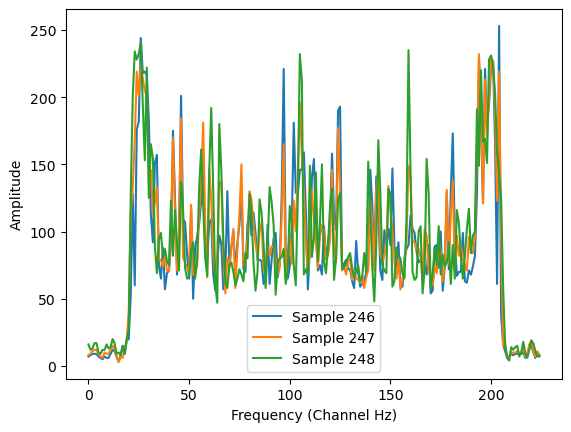

In [6]:
# Print three samples
print(f"FFT sample: {imgrow}")
plt.xlabel("Frequency (Channel Hz)") 
plt.ylabel("Amplitude")
plt.plot(img[slide.value -1], label=f'Sample {slide.value -1}')
plt.plot(img[slide.value], label=f'Sample {slide.value}')
plt.plot(img[slide.value +1], label=f'Sample {slide.value +1}')
plt.legend()
plt.show()

In [ ]:
# Data labelling
DFimg = pd.DataFrame(img)
DFimg['class']=4285
DFimg['class'][374:748]=4415
DFimg['class'][749:1035]=4481
DFimg.to_csv(repo + fichero.value + '.csv', index=False, header=None)

## Loading dataset

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

df = pd.read_csv(repo + fichero.value + '.csv', header=None)
#df.head()

X = df.iloc[:, 1:-1].to_numpy() # Image Data all columns except last
y = df.iloc[:, -1].to_numpy() # Last column is Class
y

array([4285, 4285, 4285, ..., 4481, 4481, 4285], dtype=int64)

In [8]:
#scaler = MinMaxScaler()
#scaler.fit(X)
#scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [9]:
# different learning rate schedules and momentum parameters
neurons = imgcol
capas = 4
params = {
        'hidden_layer_sizes': (capas, neurons),
        'learning_rate': 'constant',
        'learning_rate_init': 0.001,
        'max_fun': 15000,
        'max_iter': 100,
        'momentum': 0.9,
        'learning_rate_init': 0.001,
        'solver': 'adam',
        'tol': 1e-07,
    }

In [10]:
# Defining AN Network
tol = 0.0000001
hidden_layers = 4
clf = MLPClassifier(random_state=1, max_iter=100, tol=tol, hidden_layer_sizes=(hidden_layers, neurons), verbose=True)

In [11]:
# Training Network
epochs = 300
clases = [4285,4415,4481]
print("Begin training.")
for e in range(1, epochs):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    clf.partial_fit(X_train, y_train, classes=clases)

print("End training.")

Begin training.
Iteration 1, loss = 3.47284793
Iteration 2, loss = 1.78472106
Iteration 3, loss = 1.29224689
Iteration 4, loss = 0.70228677
Iteration 5, loss = 0.66535074
Iteration 6, loss = 0.53843849
Iteration 7, loss = 0.44773751
Iteration 8, loss = 0.43298370
Iteration 9, loss = 0.38612744
Iteration 10, loss = 0.34502002
Iteration 11, loss = 0.31785726
Iteration 12, loss = 0.28067865
Iteration 13, loss = 0.24888617
Iteration 14, loss = 0.23050772
Iteration 15, loss = 0.20938624
Iteration 16, loss = 0.19410588
Iteration 17, loss = 0.17717108
Iteration 18, loss = 0.16045460
Iteration 19, loss = 0.14955908
Iteration 20, loss = 0.14283304
Iteration 21, loss = 0.13503972
Iteration 22, loss = 0.12612387
Iteration 23, loss = 0.11764610
Iteration 24, loss = 0.10999412
Iteration 25, loss = 0.10414682
Iteration 26, loss = 0.09962500
Iteration 27, loss = 0.09532950
Iteration 28, loss = 0.09145051
Iteration 29, loss = 0.08795169
Iteration 30, loss = 0.08487752
Iteration 31, loss = 0.08192023
I

Iteration 269, loss = 0.00055047
Iteration 270, loss = 0.00057565
Iteration 271, loss = 0.00054531
Iteration 272, loss = 0.00057199
Iteration 273, loss = 0.00049790
Iteration 274, loss = 0.00049169
Iteration 275, loss = 0.00050225
Iteration 276, loss = 0.00047884
Iteration 277, loss = 0.00050261
Iteration 278, loss = 0.00044735
Iteration 279, loss = 0.00043968
Iteration 280, loss = 0.00042919
Iteration 281, loss = 0.00042529
Iteration 282, loss = 0.00045879
Iteration 283, loss = 0.00045935
Iteration 284, loss = 0.00040366
Iteration 285, loss = 0.00039321
Iteration 286, loss = 0.00040471
Iteration 287, loss = 0.00041063
Iteration 288, loss = 0.00043865
Iteration 289, loss = 0.00036867
Iteration 290, loss = 0.00041215
Iteration 291, loss = 0.00041222
Iteration 292, loss = 0.00035696
Iteration 293, loss = 0.00044020
Iteration 294, loss = 0.00038810
Iteration 295, loss = 0.00034900
Iteration 296, loss = 0.00040416
Iteration 297, loss = 0.00035395
Iteration 298, loss = 0.00032892
Iteration 

Text(0, 0.5, 'Loss')

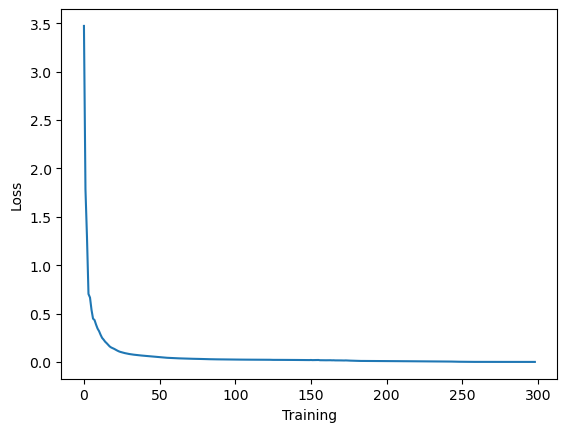

In [12]:
plt.plot(clf.loss_curve_)
plt.xlabel('Training')
plt.ylabel('Loss')

In [14]:
# Score
clf.score(X_test, y_test)

0.9922779922779923

In [15]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (4, 225),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

Accuracy: 0.9743589743589743
Recall (macro): 0.9738562091503268
Recall (micro): 0.9743589743589743
Recall (weighted): 0.9743589743589743
F1 score: 0.97433845333005


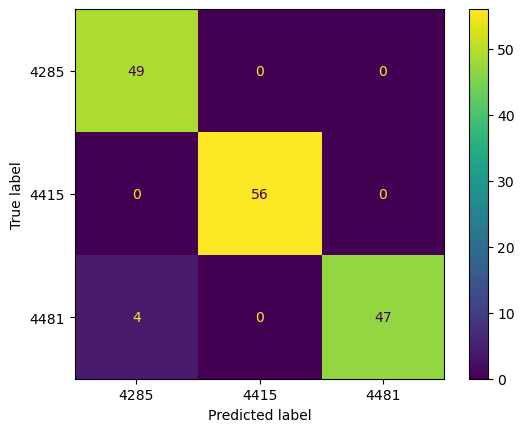

In [17]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, f1_score

ex_classes = {'Classes': ['4285', '4415', '4481']}
df_classes = pd.DataFrame(data=ex_classes)
label_enc = LabelEncoder()
label_enc.fit(df_classes['Classes'])
y_pred = clf.predict(X_val)

print('Accuracy: ' + str(accuracy_score(y_val, y_pred)))
print('Recall (macro): ' + str(recall_score(y_val, y_pred, average='macro')))
print('Recall (micro): ' + str(recall_score(y_val, y_pred, average='micro')))
print('Recall (weighted): ' + str(recall_score(y_val, y_pred, average='weighted')))
print('F1 score: ' + str(f1_score(y_val, y_pred, average='weighted')))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label_enc.classes_)
cm_display.plot()
plt.show()

In [18]:
size = len(X_val)
print(f"Samples number in validation group: {size}")
prediction = clf.predict(X_val)
print(pd.DataFrame(prediction).value_counts() / size * 100)

Samples number in validation group: 156
4415    35.897436
4285    33.974359
4481    30.128205
dtype: float64


In [19]:
#size = len(X2)
#prediction = clf.predict(X2)
#print(pd.DataFrame(prediction).value_counts() / size * 100)

In [20]:
from joblib import dump, load

dump(clf, 'clasiator_1/clasiatorRF.joblib') 

['clasiator_1/clasiatorRF.joblib']